## Actividad 2.2

- Fernando Guadarrama				A01379340
- Camila Trujillo					A01737170
- Mauricio Goris					A01736428
- Bernardo Quintana 	            A01658064

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 

## Agregar archivo

In [406]:
#Cargamos los datos
data = pd.read_csv('DataAnalytics.csv')

## Nulos y outliers

In [407]:
valores_nulos = data.isnull().sum()
print(valores_nulos)

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64


In [408]:
numericas = data.select_dtypes(include=['int64', 'float64'])
cualitativas = data.select_dtypes(include=['object'])

numericas_generales = numericas.drop(['tiempo de sesión', 'tiempo de lección'], axis=1)
numericas_generales_sin_nulos = numericas_generales.fillna(numericas_generales.mean())

In [409]:
tiempo_sesion = numericas['tiempo de sesión']
tiempo_leccion = numericas['tiempo de lección']

media_sesion_sin_ceros = tiempo_sesion.mean()
media_leccion_sin_ceros = tiempo_leccion.mean()

tiempo_sesion_sin_nulos = tiempo_sesion.fillna(media_sesion_sin_ceros)
tiempo_leccion_sin_nulos = tiempo_leccion.fillna(media_leccion_sin_ceros)

In [410]:
numericas_con0 = pd.concat([tiempo_sesion_sin_nulos, tiempo_leccion_sin_nulos], axis=1)

<Figure size 1500x1000 with 0 Axes>

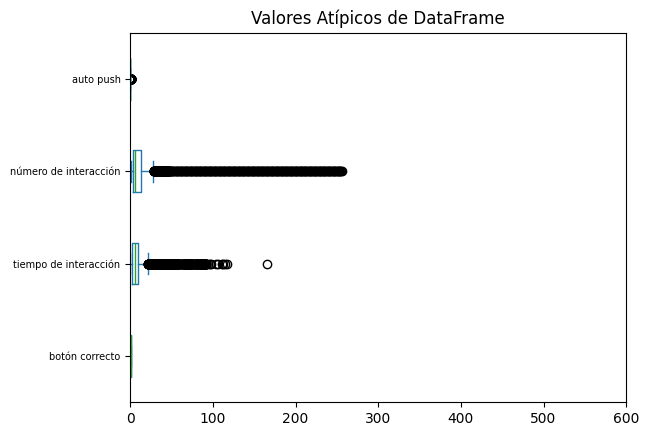

In [411]:
fig = plt.figure(figsize = (15,10))
numericas_generales_sin_nulos.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [412]:
y=numericas_generales_sin_nulos

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido botón correcto            2.50000
tiempo de interacción    21.81771
número de interacción    28.84852
auto push                 0.00000
dtype: float64
Limite inferior permitido botón correcto           -1.500000
tiempo de interacción    -9.731186
número de interacción   -12.509112
auto push                 0.000000
dtype: float64


In [413]:
data2_iqr= numericas_generales_sin_nulos[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr.head(5)

,botón correcto,tiempo de interacción,número de interacción,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0


In [414]:
valores_nulos2=data2_iqr.isnull().sum()
valores_nulos2

botón correcto             0
tiempo de interacción    669
número de interacción    371
auto push                816
dtype: int64

In [415]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr.head(10)

,botón correcto,tiempo de interacción,número de interacción,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0
5,0.0,7.400463,6.0,0.0
6,0.0,13.167350,7.0,0.0
7,1.0,5.900000,8.0,0.0
8,0.0,14.517180,9.0,0.0
9,0.0,15.617350,10.0,0.0


<Figure size 1500x1000 with 0 Axes>

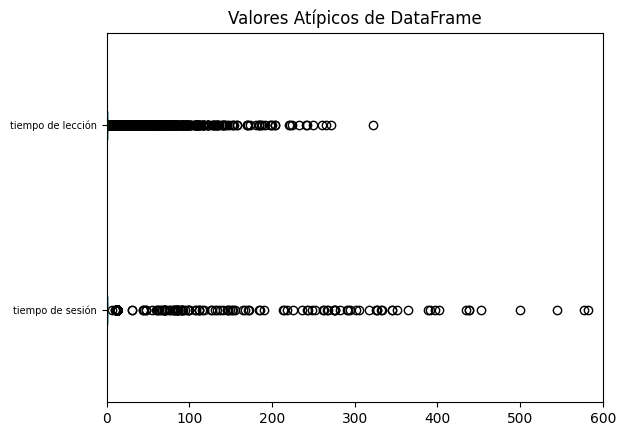

In [416]:
fig = plt.figure(figsize = (15,10))
numericas_con0.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [417]:
y = numericas_con0

percentile1 = y.quantile(0.01) 
percentile99 = y.quantile(0.99)  

print("Límite superior permitido: ", percentile99)
print("Límite inferior permitido: ", percentile1)

Límite superior permitido:  tiempo de sesión     296.973188
tiempo de lección    118.946856
Name: 0.99, dtype: float64
Límite inferior permitido:  tiempo de sesión     0.0
tiempo de lección    0.0
Name: 0.01, dtype: float64


In [418]:
data4_iqr = numericas_con0[(y<=percentile99)&(y>=percentile1)]
data4_iqr.head(5)

,tiempo de sesión,tiempo de lección
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [419]:
valores_nulos3=data4_iqr.isnull().sum()
valores_nulos3

tiempo de sesión     59
tiempo de lección    59
dtype: int64

In [420]:
data5_iqr=data4_iqr.copy()
data5_iqr=data4_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.head(10)

,tiempo de sesión,tiempo de lección
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [421]:
valores_nulos4=data5_iqr.isnull().sum()
valores_nulos4

tiempo de sesión     0
tiempo de lección    0
dtype: int64

In [422]:
data_final = pd.concat([cualitativas.fillna("Sin Dato"), data3_iqr, data5_iqr], axis=1)

In [423]:
valores_nulos5=data_final.isnull().sum()
valores_nulos5

Administrador            0
Usuario                  0
mini juego               0
color presionado         0
dificultad               0
fecha                    0
Juego                    0
botón correcto           0
tiempo de interacción    0
número de interacción    0
auto push                0
tiempo de sesión         0
tiempo de lección        0
dtype: int64

## Convertir variables categóricas ordinales

In [424]:
cat1 = data_final.groupby(['Administrador'])['Administrador'].count().sort_values(ascending=False)
cat1


Administrador
ALEIDA            3260
nicolas            440
LEONARDO           371
DENISSE            302
SERGIO ANGEL       243
CARLOS ENRIQUE     228
YAEL DAVID         224
AUSTIN             199
VALENTIN           163
erick              158
IKER BENJAMIN      128
KYTZIA              98
BENJAMIN            51
Name: Administrador, dtype: int64

In [425]:
data_final.Administrador = data_final.Administrador.replace({'ALEIDA':'1'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'nicolas':'2'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'LEONARDO':'3'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'DENISSE':'4'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'SERGIO ANGEL':'5'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'CARLOS ENRIQUE':'6'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'YAEL DAVID':'7'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'AUSTIN':'8'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'VALENTIN':'9'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'erick':'10'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'IKER BENJAMIN':'11'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'KYTZIA':'12'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'BENJAMIN':'13'}, regex=False)

In [426]:
cat2 = data_final.groupby(['Usuario'])['Usuario'].count().sort_values(ascending=False)
cat2

Usuario
LEONARDO              546
ALEIDA                487
nicolas               440
JOSE JAVIER           394
LEONARDO              371
JESUS ALEJANDRO       356
ramiro isai           332
ADRIAN                280
SERGIO ANGEL          243
CARLOS ENRIQUE        228
DENISSE               228
YAEL DAVID            224
VALENTIN              163
erick                 158
IKER BENJAMIN         152
NICOLAS |             128
ERICK OSVALDO         126
CONCEPCION            103
KYTZIA                 98
AUSTIN                 96
JOSE IGNACIO TADEO     94
JOSE IAN               86
ASHLEY                 75
JOSHUA                 74
YEREMI YAZMIN          71
MA DEL ROSARIO         64
BENJAMIN               51
INGRID                 49
RENE                   44
CARLOS ABEL            39
ARLETT                 29
ESMERALDA              24
IRVING                 10
jesus eduardo           2
Name: Usuario, dtype: int64

In [427]:
data_final.Usuario = data_final.Usuario.replace({'LEONARDO':'1'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ALEIDA':'2'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'nicolas':'3'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE JAVIER ':'4'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'LEONARDO ':'5'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JESUS ALEJANDRO':'6'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ramiro isai':'7'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ADRIAN ':'8'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'SERGIO ANGEL':'9'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CARLOS ENRIQUE':'10'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'DENISSE':'11'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'YAEL DAVID':'12'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'VALENTIN':'13'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'erick ':'14'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'IKER BENJAMIN':'15'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'NICOLAS |':'16'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ERICK OSVALDO':'17'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CONCEPCION':'18'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'KYTZIA':'19'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'AUSTIN':'20'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE IGNACIO TADEO':'21'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE IAN':'22'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ASHLEY ':'23'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSHUA':'24'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'YEREMI YAZMIN ':'25'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'MA DEL ROSARIO ':'26'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'BENJAMIN':'27'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'INGRID':'28'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'RENE ':'29'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CARLOS ABEL':'30'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ARLETT':'31'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ESMERALDA':'32'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'IRVING ':'33'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'jesus eduardo':'34'}, regex=False)

In [428]:
cat3 = data_final.groupby(['mini juego'])['mini juego'].count().sort_values(ascending=False)
cat3

mini juego
Asteroides            1054
Restaurante            869
Estrellas              813
Gusanos                748
sonidos y animales     743
animales y colores     545
figuras y colores      400
partes del cuerpo      320
Despegue               196
Sin Dato               156
MiniGame_0               8
MiniGame_2               5
MiniGame_3               5
MiniGame_1               3
Name: mini juego, dtype: int64

In [429]:
data_final['mini juego'] = data_final['mini juego'].replace({'Asteroides':'1'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Restaurante':'2'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Estrellas':'3'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Gusanos':'4'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'sonidos y animales':'5'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'animales y colores':'6'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'figuras y colores':'7'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'partes del cuerpo':'8'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Despegue':'9'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Sin Dato':'10'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_0':'11'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_2':'12'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_3':'13'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_1':'14'}, regex=False)

In [430]:
cat4 = data_final.groupby(['color presionado'])['color presionado'].count().sort_values(ascending=False)
cat4

color presionado
violet      1361
green       1298
yellow      1233
blue        1182
Sin Dato     762
red           29
Name: color presionado, dtype: int64

In [431]:
data_final['color presionado'] = data_final['color presionado'].replace({'violet':'1'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'green':'2'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'yellow':'3'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'blue':'4'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'Sin Dato':'5'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'red':'6'}, regex=False)

In [432]:
cat5 = data_final.groupby(['dificultad'])['dificultad'].count().sort_values(ascending=False)
cat5

dificultad
Episodio 1    2357
Episodio 2    1493
Episodio 3    1292
Episodio 4     723
Name: dificultad, dtype: int64

In [433]:
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 1':'1'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 2':'2'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 3':'3'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 4':'4'}, regex=False)


In [434]:
cat6 = data_final.groupby(['Juego'])['Juego'].count().sort_values(ascending=False)
cat6

Juego
Astro      3799
Cadetes    2066
Name: Juego, dtype: int64

In [435]:
data_final['Juego'] = data_final['Juego'].replace({'Astro':'1'}, regex=False)
data_final['Juego'] = data_final['Juego'].replace({'Cadetes':'2'}, regex=False)

In [436]:
data_final = data_final.drop(columns=['fecha', 'auto push'])
data_final

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
0,2,3,9,4,1,1,1.000000,5.399169,1.000000,0.000000,0.000000
1,2,3,9,1,1,1,0.000000,1.283400,2.000000,0.000000,0.000000
2,2,3,9,2,1,1,1.000000,2.700226,3.000000,0.000000,0.000000
3,2,3,9,2,1,1,0.000000,3.050262,4.000000,0.000000,0.000000
4,2,3,9,2,1,1,0.000000,4.750256,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5860,1,32,10,5,1,1,0.492455,9.986874,13.339408,3.500000,6.255414
5861,1,4,1,2,3,1,0.000000,2.135419,1.000000,0.000000,0.000000
5862,1,4,1,5,3,1,0.492455,9.986874,13.339408,12.422171,2.271806
5863,1,4,10,5,3,1,0.492455,9.986874,13.339408,6.478299,6.255414


In [437]:
usuario1 = data_final[data_final["Usuario"] == "27"]
usuario2 = data_final[data_final["Usuario"] == "30"]
usuario3 = data_final[data_final["Usuario"] == "10"]
usuario4 = data_final[data_final["Usuario"] == "18"]
usuario5 = data_final[data_final["Usuario"] == "11"]

In [438]:
corr_factors = data_final.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
Administrador,1.000000,0.322260,0.054005,0.041980,-0.099609,0.080074,1.632966e-01,0.056195,-0.167089,-6.272056e-03,5.786454e-02
Usuario,0.322260,1.000000,0.230795,0.054966,-0.078773,0.321093,1.415035e-01,0.131598,-0.126316,2.959428e-02,5.439875e-02
mini juego,0.054005,0.230795,1.000000,0.179507,-0.157252,0.625713,8.406136e-02,0.222250,0.012451,2.726506e-01,9.563100e-02
color presionado,0.041980,0.054966,0.179507,1.000000,0.027161,0.056677,-3.542608e-03,0.202751,0.240833,2.862603e-01,4.490545e-01
dificultad,-0.099609,-0.078773,-0.157252,0.027161,1.000000,-0.115208,2.456645e-03,-0.137693,0.109544,8.336780e-02,-4.185349e-02
Juego,0.080074,0.321093,0.625713,0.056677,-0.115208,1.000000,4.963483e-02,0.213118,-0.060832,2.213791e-02,8.865031e-02
botón correcto,0.163297,0.141503,0.084061,-0.003543,0.002457,0.049635,1.000000e+00,-0.033854,-0.263887,9.987735e-17,-3.852461e-17
tiempo de interacción,0.056195,0.131598,0.222250,0.202751,-0.137693,0.213118,-3.385360e-02,1.000000,0.157743,1.550645e-01,2.432487e-01
número de interacción,-0.167089,-0.126316,0.012451,0.240833,0.109544,-0.060832,-2.638873e-01,0.157743,1.000000,1.880344e-01,2.949683e-01
tiempo de sesión,-0.006272,0.029594,0.272651,0.286260,0.083368,0.022138,9.987735e-17,0.155065,0.188034,1.000000e+00,1.634898e-01


In [439]:
corr_factors1 = abs(corr_factors)
corr_factors1

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
Administrador,1.000000,0.322260,0.054005,0.041980,0.099609,0.080074,1.632966e-01,0.056195,0.167089,6.272056e-03,5.786454e-02
Usuario,0.322260,1.000000,0.230795,0.054966,0.078773,0.321093,1.415035e-01,0.131598,0.126316,2.959428e-02,5.439875e-02
mini juego,0.054005,0.230795,1.000000,0.179507,0.157252,0.625713,8.406136e-02,0.222250,0.012451,2.726506e-01,9.563100e-02
color presionado,0.041980,0.054966,0.179507,1.000000,0.027161,0.056677,3.542608e-03,0.202751,0.240833,2.862603e-01,4.490545e-01
dificultad,0.099609,0.078773,0.157252,0.027161,1.000000,0.115208,2.456645e-03,0.137693,0.109544,8.336780e-02,4.185349e-02
Juego,0.080074,0.321093,0.625713,0.056677,0.115208,1.000000,4.963483e-02,0.213118,0.060832,2.213791e-02,8.865031e-02
botón correcto,0.163297,0.141503,0.084061,0.003543,0.002457,0.049635,1.000000e+00,0.033854,0.263887,9.987735e-17,3.852461e-17
tiempo de interacción,0.056195,0.131598,0.222250,0.202751,0.137693,0.213118,3.385360e-02,1.000000,0.157743,1.550645e-01,2.432487e-01
número de interacción,0.167089,0.126316,0.012451,0.240833,0.109544,0.060832,2.638873e-01,0.157743,1.000000,1.880344e-01,2.949683e-01
tiempo de sesión,0.006272,0.029594,0.272651,0.286260,0.083368,0.022138,9.987735e-17,0.155065,0.188034,1.000000e+00,1.634898e-01


<Axes: >

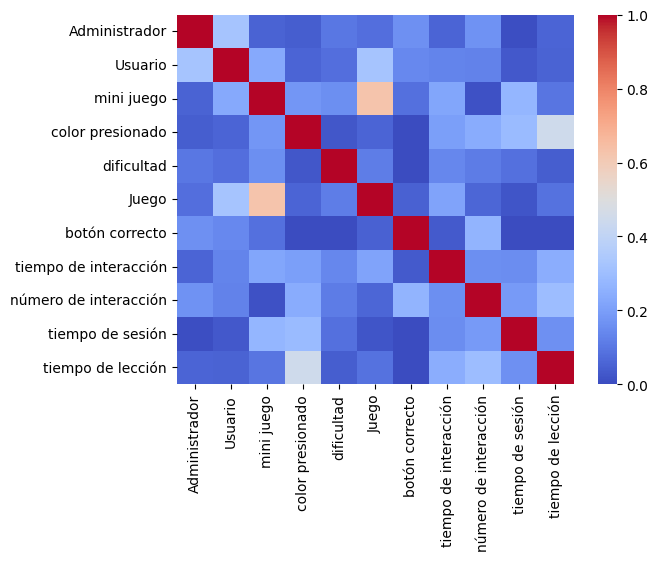

In [440]:
heat_map = sns.heatmap(corr_factors1, cmap = 'coolwarm')
heat_map

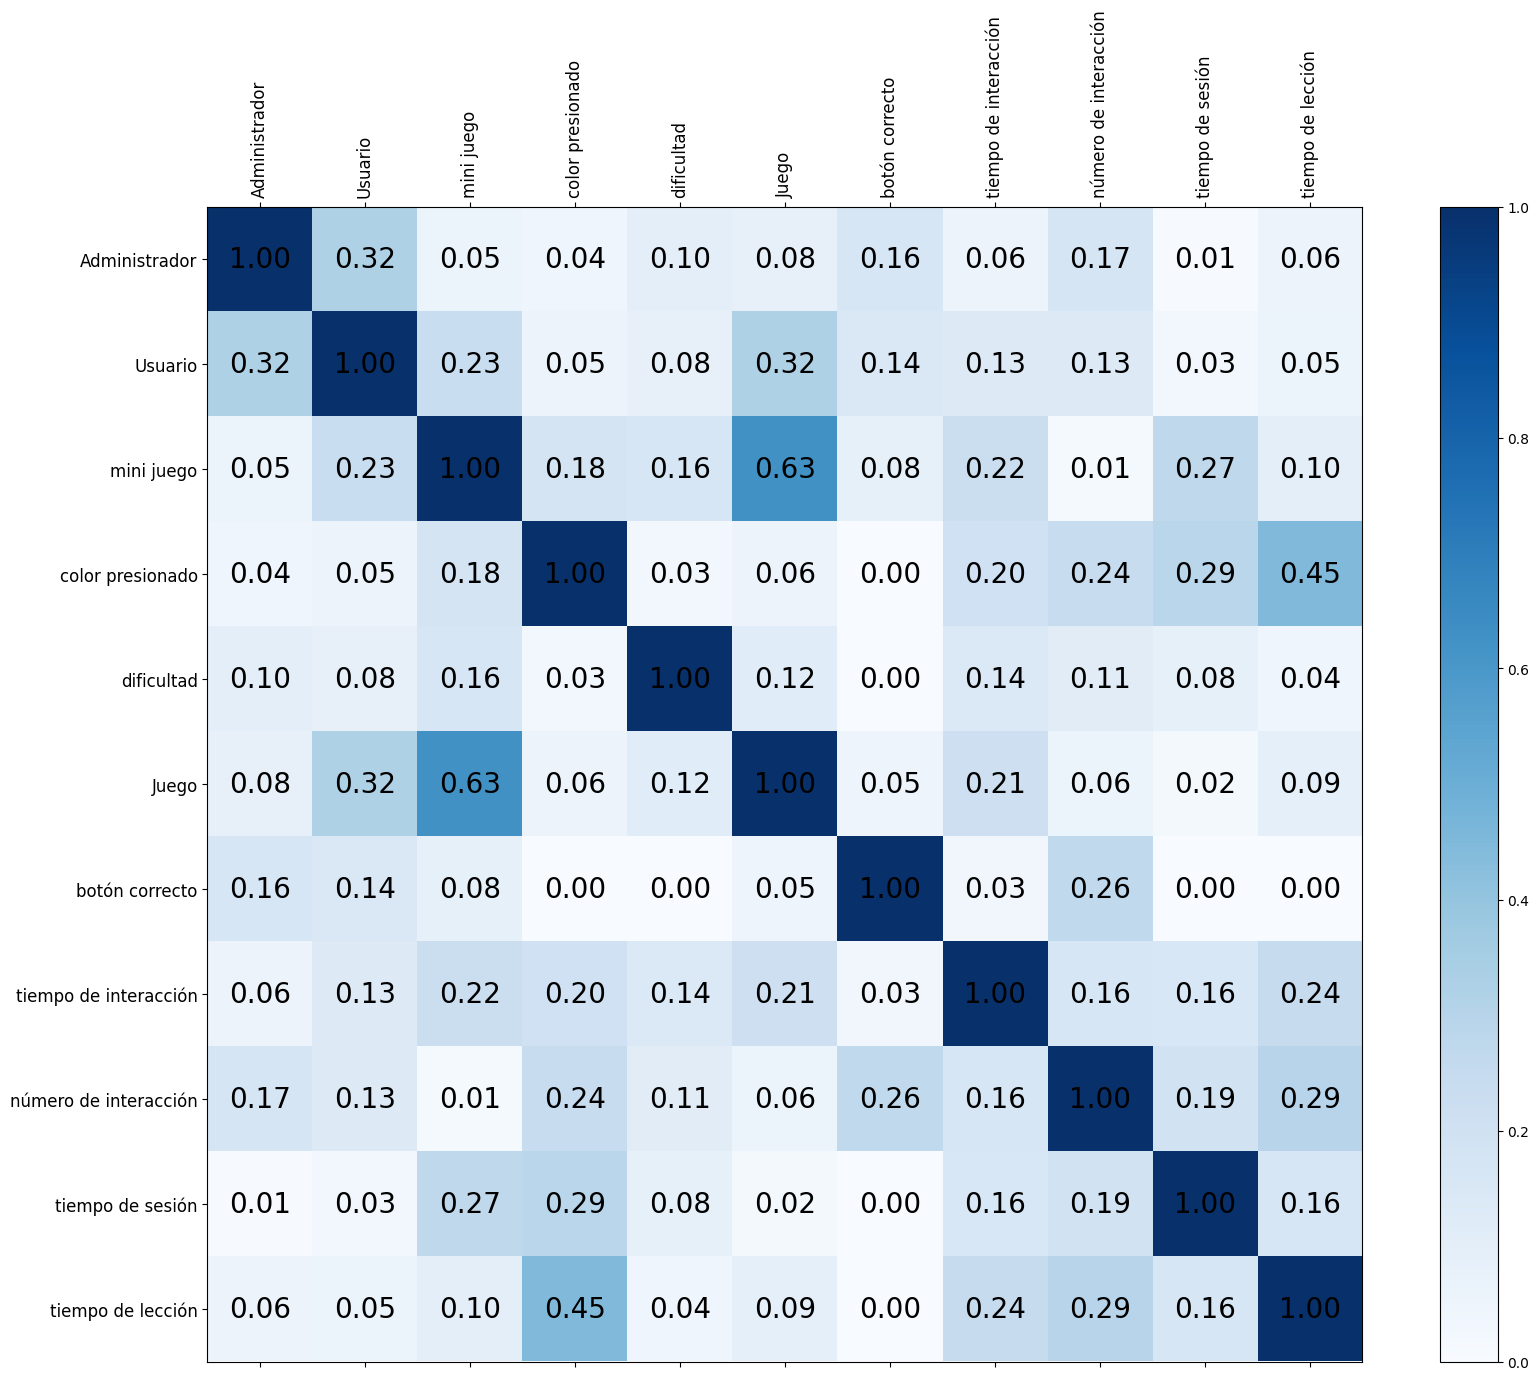

In [487]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_factors1, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors1.shape[0]):
    for j in range(corr_factors1.shape[1]):
        ax.text(j, i, f"{corr_factors1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors1.columns)), corr_factors1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors1.index)), corr_factors1.index, fontsize=12)
plt.savefig('General.png', dpi=300, bbox_inches='tight')
plt.show()

## Linear Múltiple

In [442]:
Vars_Indep= data_final[['Administrador', 'mini juego','color presionado', 'color presionado', 'dificultad', 'Juego', 'botón correcto', 'número de interacción', 'tiempo de sesión', 'tiempo de lección']]
Var_Dep= data_final['Usuario']

In [443]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [444]:
type(model)

sklearn.linear_model._base.LinearRegression

In [445]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [446]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Administrador', 'mini juego', 'color presionado',
        'color presionado', 'dificultad', 'Juego', 'botón correcto',
        'número de interacción', 'tiempo de sesión', 'tiempo de lección'],
       dtype=object),
 'n_features_in_': 10,
 'coef_': array([ 0.65629247,  0.08974791,  0.07175521,  0.07175521, -0.07939108,
         4.29405783,  1.06088954, -0.08203997,  0.007669  ,  0.00673389]),
 'rank_': 9,
 'singular_': array([1.54642157e+03, 1.19129309e+03, 4.06247709e+02, 2.37999554e+02,
        1.87337756e+02, 1.26459585e+02, 7.78936716e+01, 3.39313390e+01,
        2.74803359e+01, 5.68165156e-13]),
 'intercept_': 1.4084521691256988}

In [447]:
model.score(Vars_Indep,Var_Dep)

0.20249809384993434

In [448]:
y_pred= model.predict(X=data_final[['Administrador', 'mini juego','color presionado', 'color presionado', 'dificultad', 'Juego', 'botón correcto', 'número de interacción', 'tiempo de sesión', 'tiempo de lección']])
y_pred

array([9.29632634, 7.72286556, 8.84522555, ..., 6.46656907, 7.25554194,
       7.39087339])

In [449]:
data_final.insert(0, 'Predicciones', y_pred)
data_final

,Predicciones,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
0,9.296326,2,3,9,4,1,1,1.000000,5.399169,1.000000,0.000000,0.000000
1,7.722866,2,3,9,1,1,1,0.000000,1.283400,2.000000,0.000000,0.000000
2,8.845226,2,3,9,2,1,1,1.000000,2.700226,3.000000,0.000000,0.000000
3,7.702296,2,3,9,2,1,1,0.000000,3.050262,4.000000,0.000000,0.000000
4,7.620256,2,3,9,2,1,1,0.000000,4.750256,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,7.391484,1,32,10,5,1,1,0.492455,9.986874,13.339408,3.500000,6.255414
5861,6.415358,1,4,1,2,3,1,0.000000,2.135419,1.000000,0.000000,0.000000
5862,6.466569,1,4,1,5,3,1,0.492455,9.986874,13.339408,12.422171,2.271806
5863,7.255542,1,4,10,5,3,1,0.492455,9.986874,13.339408,6.478299,6.255414


In [450]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.20249809384993434

In [451]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.44999788205049845

El coeficiente de correlación simple entre Juego y Usuario era de 0.32 (R2=10.24%), indicando una relación débil-moderada, pero al introducir un modelo de regresión lineal múltiple con variables adicionales (tiempo de sesión, número de interacciones), el coeficiente de correlación múltiple R aumentó a 0.44 (R2=19.36%), lo que demuestra que el modelo múltiple casi duplica la capacidad explicativa sobre Usuario (de 10% a 19%), sugiriendo que las variables añadidas aportan información complementaria no capturada únicamente por Juego, mejorando así la precisión predictiva al considerar múltiples factores de comportamiento.

## Filtrado por usuarios

**Benjamín**

In [452]:
corr_factorsu1 = usuario1.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu1

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.264407,0.084592,0.016692,0.096144,0.208386,0.871506,0.027196
color presionado,0.264407,1.000000,-0.332598,-0.142168,0.302118,0.490704,0.344148,0.506580
dificultad,0.084592,-0.332598,1.000000,0.041072,0.036646,0.116633,0.304446,0.013318
botón correcto,0.016692,-0.142168,0.041072,1.000000,-0.071754,0.159280,0.035281,0.051934
tiempo de interacción,0.096144,0.302118,0.036646,-0.071754,1.000000,0.330938,0.081117,0.119402
número de interacción,0.208386,0.490704,0.116633,0.159280,0.330938,1.000000,0.348090,0.512384
tiempo de sesión,0.871506,0.344148,0.304446,0.035281,0.081117,0.348090,1.000000,0.085109
tiempo de lección,0.027196,0.506580,0.013318,0.051934,0.119402,0.512384,0.085109,1.000000


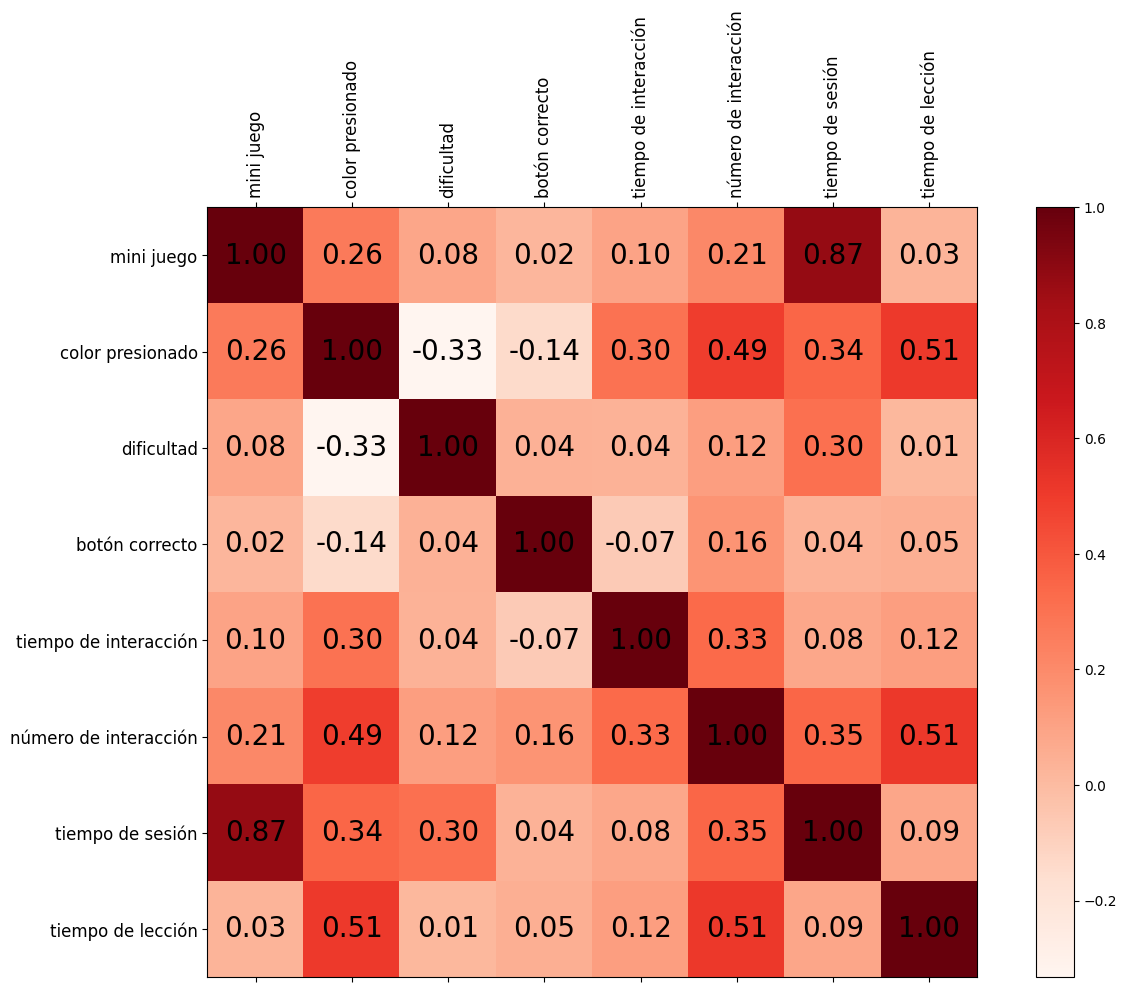

In [453]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu1, cmap="Reds")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu1.shape[0]):
    for j in range(corr_factorsu1.shape[1]):
        ax.text(j, i, f"{corr_factorsu1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu1.columns)), corr_factorsu1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu1.index)), corr_factorsu1.index, fontsize=12)
plt.savefig('Usuario1.png', dpi=300, bbox_inches='tight')
plt.show()

In [454]:
Vars_IndepU1= usuario1[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'tiempo de interacción', 'número de interacción', 'tiempo de lección']]
Var_DepU1= usuario1['tiempo de sesión']

In [455]:
modelU1 = LinearRegression()
modelU1.fit(X=Vars_IndepU1, y=Var_DepU1)

LinearRegression()

In [456]:
y_predU1= modelU1.predict(X=usuario1[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'tiempo de interacción', 'número de interacción', 'tiempo de lección']])
y_predU1

array([ -8.02875295,  -7.11970909,  -9.19752249, -11.42553793,
       -14.6380679 , -14.64337209,  -5.07374081,  -8.37380943,
        -9.12680963,  -8.46419466,   2.49565115,  -3.23645087,
         7.12152047, -10.89425418, -22.22996643, -21.75601766,
       -16.96847687, -16.29260005, -15.57576681,  10.12979036,
         5.14782109,   5.69034755,   5.3910074 ,   1.06474693,
         1.58059721,  -0.43773642,  -1.37856357,  -1.90521334,
        -2.21765499,   9.31549137,   8.05646376,   8.45697047,
        17.21162476,  14.76304604, 221.68268072,  14.41227377,
        -5.41769364,   5.9997347 ,   8.43907524,  11.56983669,
        -0.71239352,  26.21864637,  -0.7605713 ,   1.79850819,
        15.97471453,  21.00056079,  21.43652877,  36.65479208,
         9.47915167,  46.03324306, 187.71660618])

In [457]:
coef_DeterU1=modelU1.score(X=Vars_IndepU1, y=Var_DepU1)
coef_CorrelU1=np.sqrt(coef_DeterU1)
coef_CorrelU1

0.9400219525094239

**Carlos Abel**

In [458]:
corr_factorsu2 = usuario2.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu2

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.269857,-0.199480,0.343419,-0.264531,0.034378,0.118272,-0.126624
color presionado,0.269857,1.000000,0.285150,0.105796,-0.063193,0.247529,0.624962,0.412690
dificultad,-0.199480,0.285150,1.000000,-0.245701,0.286715,0.058236,0.011441,0.199201
botón correcto,0.343419,0.105796,-0.245701,1.000000,-0.534316,-0.162048,-0.039605,-0.026153
tiempo de interacción,-0.264531,-0.063193,0.286715,-0.534316,1.000000,0.495046,0.204574,0.135089
número de interacción,0.034378,0.247529,0.058236,-0.162048,0.495046,1.000000,0.764405,0.504770
tiempo de sesión,0.118272,0.624962,0.011441,-0.039605,0.204574,0.764405,1.000000,0.665438
tiempo de lección,-0.126624,0.412690,0.199201,-0.026153,0.135089,0.504770,0.665438,1.000000


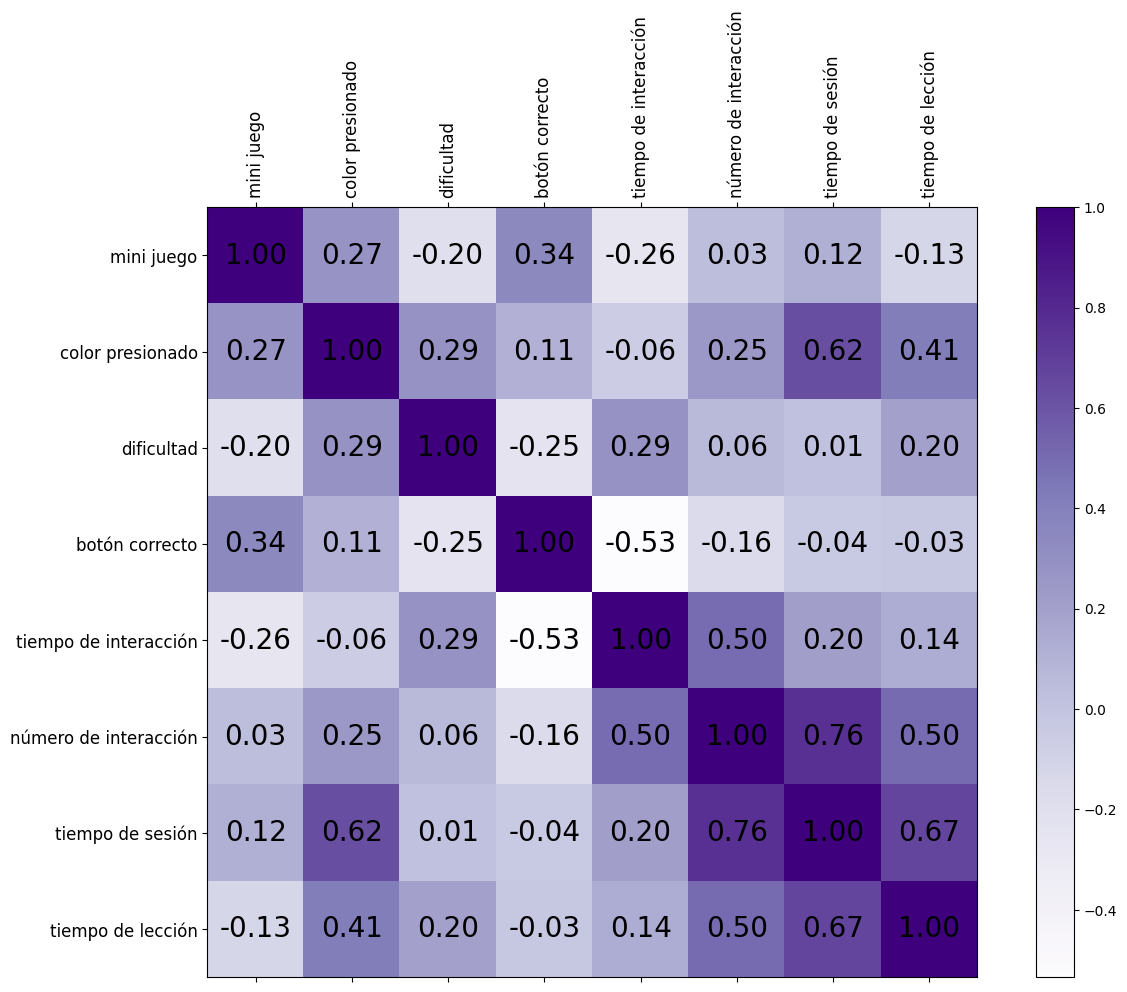

In [459]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu2, cmap="Purples")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu2.shape[0]):
    for j in range(corr_factorsu2.shape[1]):
        ax.text(j, i, f"{corr_factorsu2.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu2.columns)), corr_factorsu2.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu2.index)), corr_factorsu2.index, fontsize=12)
plt.savefig('Usuario2.png', dpi=300, bbox_inches='tight')
plt.show()

In [460]:
Vars_IndepU2= usuario2[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'tiempo de interacción', 'número de interacción', 'tiempo de lección']]
Var_DepU2= usuario2['tiempo de sesión']

In [461]:
modelU2 = LinearRegression()
modelU2.fit(X=Vars_IndepU2, y=Var_DepU2)

LinearRegression()

In [462]:
y_predU2= modelU2.predict(X=usuario2[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'tiempo de interacción', 'número de interacción', 'tiempo de lección']])
y_predU2

array([ 0.93260351, -1.06474813,  0.81523991, -1.10836142, -0.70478635,
       -0.13485341,  0.3131088 ,  0.8804968 ,  1.4440373 ,  1.93142117,
        2.39506656, 12.89522523,  0.63735532,  1.74433713,  2.25712016,
       -0.2743432 ,  1.67322172, -0.43537542,  9.47639692,  0.60966842,
       -1.49892872,  0.42169857, -1.68689856,  9.37997873,  0.51325024,
       -1.5953469 ,  0.32528039,  1.46902269, -1.20576427,  9.28356055,
       -1.5154284 , -1.76357458, -1.30671083, -0.73043653, -0.23041108,
       -0.36974279,  2.27708315, 12.3347384 ,  7.2266536 ])

In [463]:
coef_DeterU2=modelU2.score(X=Vars_IndepU2, y=Var_DepU2)
coef_CorrelU2=np.sqrt(coef_DeterU2)
coef_CorrelU2

0.9263531545269794

**Carlos Enrique**

In [464]:
corr_factorsu3 = usuario3.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu3

,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.232068,-0.213251,0.552449,-0.164220,0.352716,0.219022,0.446203,0.087864
color presionado,0.232068,1.000000,0.027340,-0.023885,-0.388219,0.692734,0.680219,0.432332,0.547172
dificultad,-0.213251,0.027340,1.000000,-0.373234,-0.129152,0.004346,0.168000,0.208400,-0.039765
Juego,0.552449,-0.023885,-0.373234,1.000000,0.025179,0.057630,-0.089111,-0.137918,0.097316
botón correcto,-0.164220,-0.388219,-0.129152,0.025179,1.000000,-0.504341,-0.574101,-0.342351,-0.433290
tiempo de interacción,0.352716,0.692734,0.004346,0.057630,-0.504341,1.000000,0.797318,0.526918,0.666882
número de interacción,0.219022,0.680219,0.168000,-0.089111,-0.574101,0.797318,1.000000,0.543545,0.687926
tiempo de sesión,0.446203,0.432332,0.208400,-0.137918,-0.342351,0.526918,0.543545,1.000000,0.196713
tiempo de lección,0.087864,0.547172,-0.039765,0.097316,-0.433290,0.666882,0.687926,0.196713,1.000000


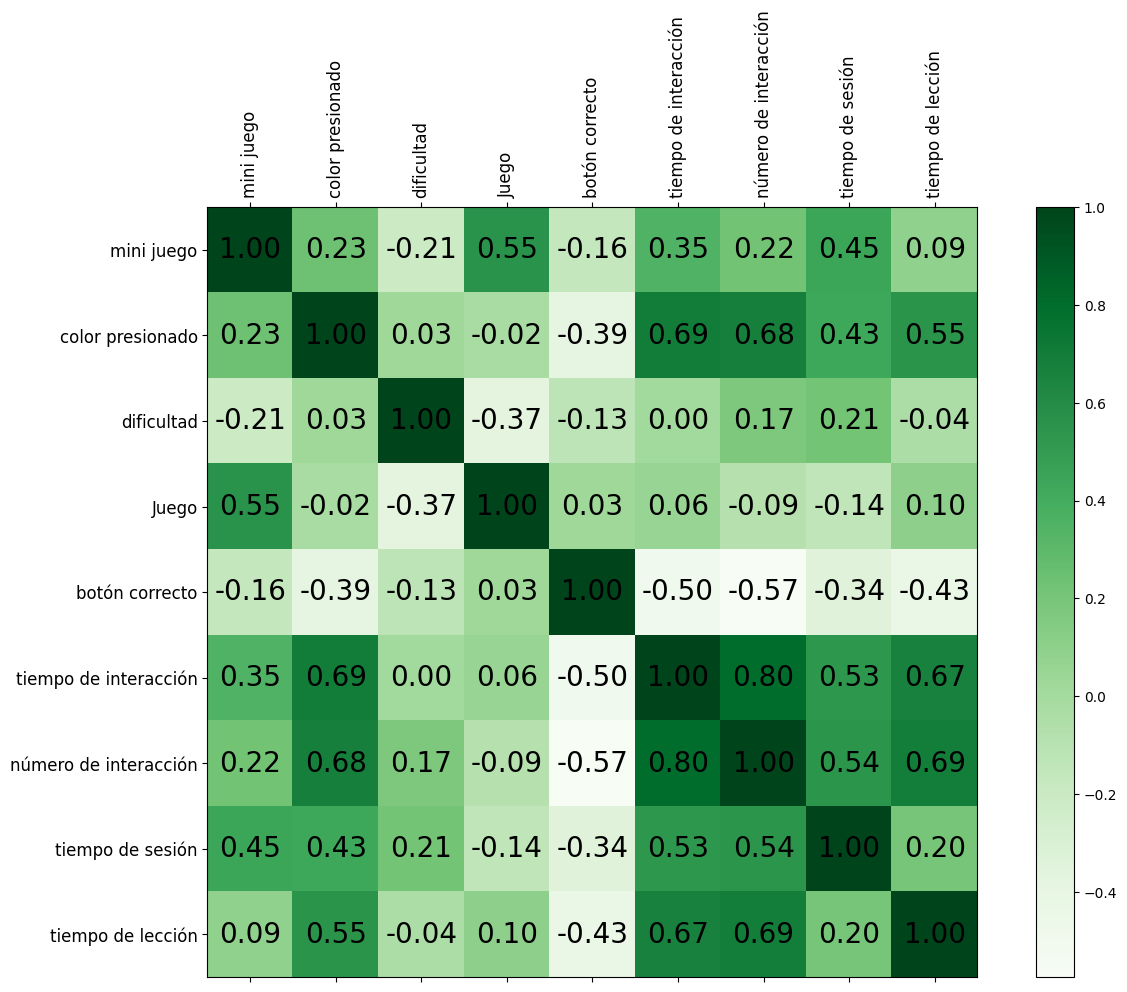

In [465]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu3, cmap="Greens")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu3.shape[0]):
    for j in range(corr_factorsu3.shape[1]):
        ax.text(j, i, f"{corr_factorsu3.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu3.columns)), corr_factorsu3.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu3.index)), corr_factorsu3.index, fontsize=12)
plt.savefig('Usuario3.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Vars_IndepU3= usuario3[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'número de interacción', 'tiempo de sesión', 'tiempo de lección']]
Var_DepU3= usuario3['tiempo de interacción']

In [467]:
modelU3 = LinearRegression()
modelU3.fit(X=Vars_IndepU3, y=Var_DepU3)

LinearRegression()

In [468]:
y_predU3= modelU3.predict(X=usuario3[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'número de interacción', 'tiempo de sesión', 'tiempo de lección']])
y_predU3

array([ 3.17200254,  2.49873169,  3.28886891,  2.61559806, 10.59365957,
        3.32369988,  2.65042903,  3.44056625,  2.7672954 , 10.41256824,
        3.47539722,  2.80212637,  3.59226359,  2.91899274,  9.95884565,
        3.62709456,  2.95382371,  3.74396093,  3.07069008, 10.80921335,
        2.49501256,  2.30954441,  3.58748432,  2.42641078, 10.02783005,
        2.64670991,  2.46124175,  3.73918166,  2.57810812, 10.4073531 ,
        1.82280187,  3.10074178,  2.91527362,  4.19321353,  9.634431  ,
        3.43790728,  2.76463643,  4.10112468,  2.8815028 ,  4.15944271,
        9.97901231,  2.79362797,  2.12035712,  2.91049434,  2.2372235 ,
        4.54931712,  4.30530063, 11.06040184,  1.96971993,  1.78425177,
        3.54999437,  3.36452622,  3.17905806, 10.62503875,  3.09702265,
        2.42375181,  2.23828365,  3.08696921,  3.81855809,  4.17944096,
        4.48177549,  5.21336437, 10.88425509,  3.24871999,  2.08764646,
        2.87778368,  2.69231552,  3.48245274, 10.75704792,  8.29

In [469]:
coef_DeterU3=modelU3.score(X=Vars_IndepU3, y=Var_DepU3)
coef_CorrelU3=np.sqrt(coef_DeterU3)
coef_CorrelU3

0.8585967929102578

**Concepción**

In [470]:
corr_factorsu4 = usuario4.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu4

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.107384,-0.123527,0.190297,-0.042083,0.066579,0.068389,0.054928
color presionado,0.107384,1.000000,0.040072,-0.063424,0.141389,0.519727,0.633043,0.536363
dificultad,-0.123527,0.040072,1.000000,-0.060697,-0.008613,0.036589,0.037100,-0.121309
botón correcto,0.190297,-0.063424,-0.060697,1.000000,0.105632,-0.251508,-0.129210,-0.109477
tiempo de interacción,-0.042083,0.141389,-0.008613,0.105632,1.000000,0.085043,0.129179,0.109451
número de interacción,0.066579,0.519727,0.036589,-0.251508,0.085043,1.000000,0.817620,0.692750
tiempo de sesión,0.068389,0.633043,0.037100,-0.129210,0.129179,0.817620,1.000000,0.864881
tiempo de lección,0.054928,0.536363,-0.121309,-0.109477,0.109451,0.692750,0.864881,1.000000


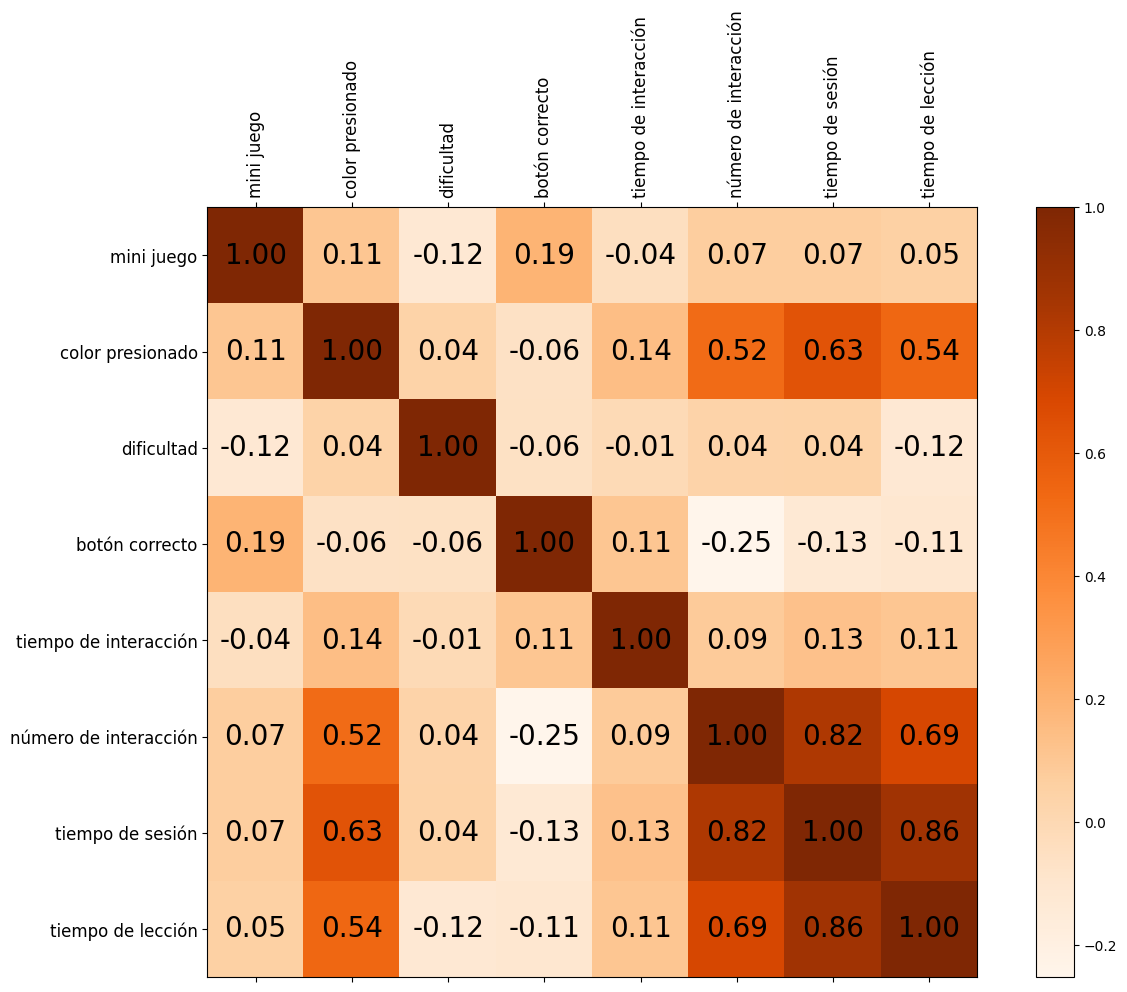

In [471]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu4, cmap="Oranges")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu4.shape[0]):
    for j in range(corr_factorsu4.shape[1]):
        ax.text(j, i, f"{corr_factorsu4.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu4.columns)), corr_factorsu4.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu4.index)), corr_factorsu4.index, fontsize=12)
plt.savefig('Usuario4.png', dpi=300, bbox_inches='tight')
plt.show()

In [472]:
Vars_IndepU4= usuario4[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'número de interacción', 'tiempo de interacción', 'tiempo de sesión']]
Var_DepU4= usuario4['tiempo de lección']

In [473]:
modelU4 = LinearRegression()
modelU4.fit(X=Vars_IndepU4, y=Var_DepU4)

LinearRegression()

In [474]:
y_predU4= modelU4.predict(X=usuario4[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'número de interacción', 'tiempo de interacción', 'tiempo de sesión']])
y_predU4

array([  4.16470198,   4.37115194,   3.8727645 ,   3.92764249,
        70.60810445,   3.69378684,   3.86427708,   3.96032686,
         3.62041493,   3.29649549,   3.42587772,   2.24508129,
         2.44422622,   2.09480993,  70.11545306,   3.15026322,
         4.22260278,   3.04858318,   2.67875497,   2.95797057,
         2.45110069,  69.62280167,   2.59927826,   2.89098828,
         2.43128155,   2.52441073,  69.13015028,  -2.19865343,
        -3.00115565,  -2.44264691,  -3.20003395,  63.81606953,
        -2.78104667,  -2.92420502,  63.32341814,  11.11557748,
         4.16781894,   4.17381876,   4.14393615,   3.37882979,
         3.06025488,   3.00941936,   2.69751869,   2.12546832,
        70.60810445,   4.58254481,   4.28931926,   4.37044105,
         3.18559433,   3.01888776,   2.39443267,   2.5193619 ,
         2.16994561,   1.61992094,   1.82743783,  70.11545306,
         3.15606519,   3.00407946,   2.88435276,   2.56044196,
        69.62280167,   3.27324297,   3.07568011,   2.59

In [475]:
coef_DeterU4=modelU4.score(X=Vars_IndepU4, y=Var_DepU4)
coef_CorrelU4=np.sqrt(coef_DeterU4)
coef_CorrelU4

0.8791127164552487

**Denisse**

In [476]:
corr_factorsu5 = usuario5.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu5

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.250775,-0.238490,0.062034,0.219065,0.013403,0.390721,0.159457
color presionado,0.250775,1.000000,-0.060264,-0.055944,0.397843,0.268965,0.445978,0.474711
dificultad,-0.238490,-0.060264,1.000000,0.072202,-0.158132,0.067359,0.163443,-0.052085
botón correcto,0.062034,-0.055944,0.072202,1.000000,-0.222831,-0.211453,-0.054230,-0.057724
tiempo de interacción,0.219065,0.397843,-0.158132,-0.222831,1.000000,0.462129,0.461092,0.490798
número de interacción,0.013403,0.268965,0.067359,-0.211453,0.462129,1.000000,0.328358,0.349513
tiempo de sesión,0.390721,0.445978,0.163443,-0.054230,0.461092,0.328358,1.000000,0.386284
tiempo de lección,0.159457,0.474711,-0.052085,-0.057724,0.490798,0.349513,0.386284,1.000000


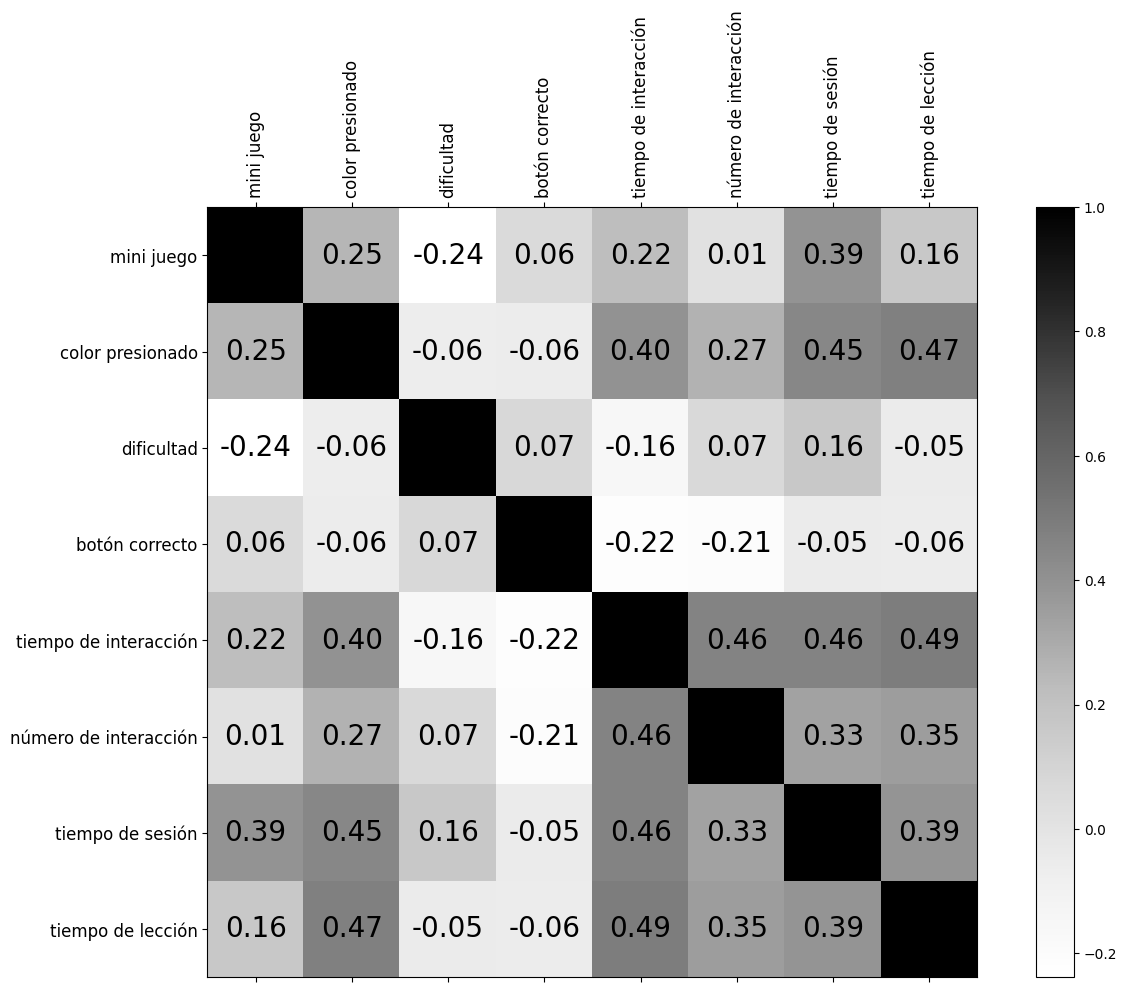

In [477]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu5, cmap="Greys")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu5.shape[0]):
    for j in range(corr_factorsu5.shape[1]):
        ax.text(j, i, f"{corr_factorsu5.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu5.columns)), corr_factorsu5.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu5.index)), corr_factorsu5.index, fontsize=12)
plt.savefig('Usuario5.png', dpi=300, bbox_inches='tight')
plt.show()

In [482]:
Vars_IndepU5= usuario5[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'número de interacción', 'tiempo de interacción', 'tiempo de sesión']]
Var_DepU5= usuario5['tiempo de lección']

In [483]:
modelU5 = LinearRegression()
modelU5.fit(X=Vars_IndepU5, y=Var_DepU5)

LinearRegression()

In [485]:
y_predU5= modelU5.predict(X=usuario5[['mini juego', 'color presionado', 'dificultad', 'botón correcto', 'número de interacción', 'tiempo de interacción', 'tiempo de sesión']])
y_predU5

array([-2.87398998, -2.58956412, -0.78351379,  3.19416506, -4.10012367,
       -1.90605937,  0.17481923,  1.55211157,  1.82365597,  0.2742735 ,
        1.59491942,  0.59044334, 13.30879785, 18.92072379,  1.19819002,
       -0.40788204,  3.30145101, -0.55275438,  1.52927845,  0.39378646,
       13.05602287, -4.32120736, -2.38788469,  2.48910174,  2.21068017,
        5.93665324, -0.21266127, 13.9528909 , -2.80850426,  1.23945831,
        3.30805628, -0.75380511, 13.72867389, -1.21418819,  0.59431064,
        1.047083  , -0.94433994, -0.66157144, 13.61656539,  6.29949907,
        7.13819863,  9.31560604, 10.38141925,  1.75773988,  1.96115428,
        3.29331545,  3.23660796,  3.4514199 ,  7.68230499,  2.19561795,
        3.74835585,  5.68215547,  1.69954137,  4.659352  ,  6.17875606,
        6.92695732, 10.91980838, 12.26896739,  7.84905763, 13.8407824 ,
       -4.01917006, -2.22201437, -0.69724689, -2.12168672, -0.47181904,
        1.50640206, -0.15649279, 13.73819322,  3.17274566,  1.00

In [486]:
coef_DeterU5=modelU5.score(X=Vars_IndepU5, y=Var_DepU5)
coef_CorrelU5=np.sqrt(coef_DeterU5)
coef_CorrelU5

0.5950791343247365